# Kaggle
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,auc, f1_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve

def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    print('Confusion Matrix: ')
    print(pd.DataFrame(confusion_matrix(y_true, y_pred)))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
df = pd.read_csv('CreditCard/creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


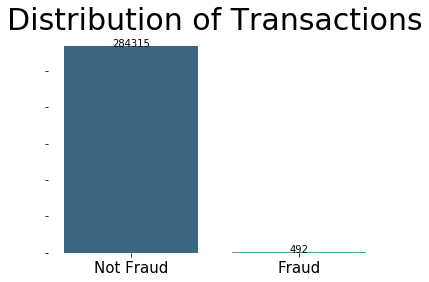

In [ ]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

### Подготовим данные train/test

In [ ]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

### Обучаем классические модели

In [ ]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9991011488441336

In [ ]:
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    71114
1       88
Name: 0, dtype: int64

In [ ]:
y_test.value_counts()

0    71070
1      132
Name: Class, dtype: int64

# Используем другие метрики

- Confusion Matrix

- Precision

- Recall

- F1

Accuracy:  0.9991011488441336
Recall:  0.5909090909090909
Precision:  0.8863636363636364
F1:  0.7090909090909092
Roc_AUC:  0.7953841922816174
Confusion Matrix: 
       0   1
0  71060  10
1     54  78


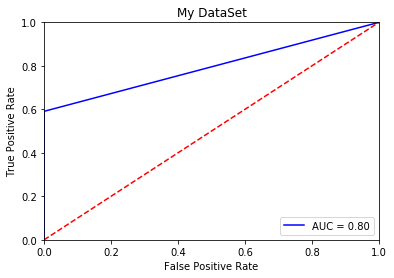

In [ ]:
value_of_metrics(y_test, lr_pred)

# Используем различные модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Accuracy:  0.9994803516755147
Recall:  0.75
Precision:  0.9611650485436893
F1:  0.8425531914893617
Roc_AUC:  0.8749718587308288
Confusion Matrix: 
       0   1
0  71066   4
1     33  99


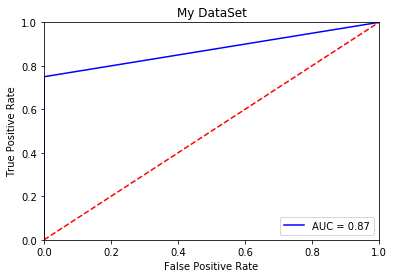

In [ ]:
value_of_metrics(y_test, rfc_pred)

# Используем техники изменения объемов выборок

##### Добавляем копии объеков миноритарного класса

In [ ]:
from sklearn.utils import resample

y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


In [ ]:
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(not_fraud), 
                          random_state=27)


upsampled = pd.concat([not_fraud, fraud_upsampled])

upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [ ]:
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

Accuracy:  0.9807589674447347
Recall:  0.8712121212121212
Precision:  0.07833787465940055
F1:  0.14375000000000002
Roc_AUC:  0.9260872763088888
Confusion Matrix: 
       0     1
0  69717  1353
1     17   115


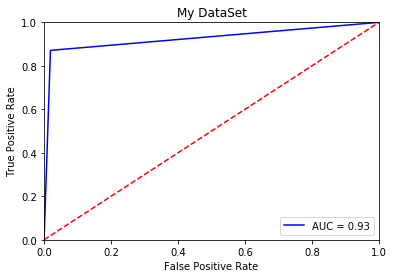

In [ ]:
value_of_metrics(y_test, upsampled_pred)

##### Уменьшаем количество объектов мажоритарного класс

In [ ]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, 
                                n_samples = len(fraud), 
                                random_state = 27)
downsampled = pd.concat([not_fraud_downsampled, fraud])
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [ ]:
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

Accuracy:  0.9758574197354007
Recall:  0.8636363636363636
Precision:  0.0628099173553719
F1:  0.11710323574730355
Roc_AUC:  0.9198511071031122
Confusion Matrix: 
       0     1
0  69369  1701
1     18   114


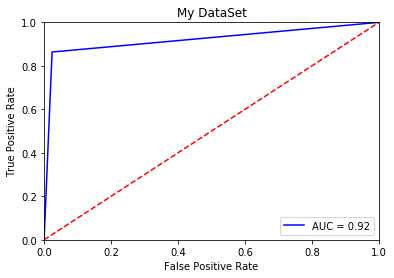

In [ ]:
value_of_metrics(y_test, undersampled_pred)

# Синтетическое увеличение миноритарного класса

##### SMOTE: Synthetic Minority Oversampling Technique

In [ ]:
!pip3 install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [ ]:
y_train.shape

(426490,)

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

Accuracy:  0.9858571388444145
Recall:  0.8636363636363636
Precision:  0.10335448776065277
F1:  0.18461538461538463
Roc_AUC:  0.9248602530155929
Confusion Matrix: 
       0    1
0  70081  989
1     18  114


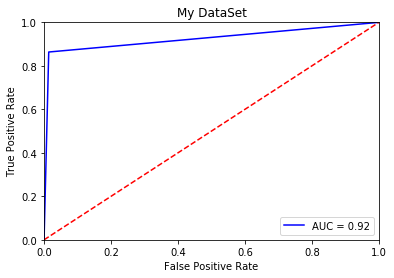

In [ ]:
value_of_metrics(y_test, smote_pred)